   Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
zp=np.array([35,45,190,200,40,70,54,150,120,110])
ks=np.array([401,574,874,919,459,739,653,902,746,832])
X=zp
Y=ks

In [71]:
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [72]:
Y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

 Найдем значение $ {\overline{y}}$ и ${\overline{x}}$, используя формулы: $\overline{x} = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$ и $\overline{y} = \frac{1}{n} \sum\limits_{i=1}^{n} y_i$
Получаем: ${\overline{x}}=101.4$, $ {\overline{y}}=709.9$

In [73]:
X_mean=X.mean()
X_mean

101.4

In [74]:
Y_mean=Y.mean()
Y_mean

709.9

Найдем $b$ по формуле $b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$ получаем: $b = 2.620538882402765$

In [75]:
b=((Y*X).mean()-Y_mean*X_mean)/((X**2).mean()-X_mean**2)
b

2.620538882402765

Находим $a$ по формуле: $ a = \overline{y} - b \cdot {\overline{x}};$ получаем $ a= 444.1773573243596 $

In [76]:
a=Y_mean-b*X_mean
a

444.1773573243596

In [77]:
Y_hat=a+b*X
Y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Построем графики Y и Y_hat

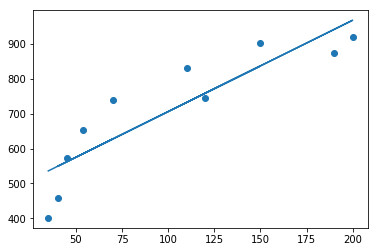

In [80]:
plt.scatter(X,Y)
plt.plot(X,Y_hat)
plt.show()

In [ ]:
Найдем коэффициент корреляции: r и коэффициент детерминации R

In [84]:
r= b * np.std(X) / np.std(Y)
R=r**2

In [85]:
r

0.8874900920739162

In [86]:
R

0.7876386635293682

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

In [90]:
alpha=1e-6

In [98]:
def mse_ (b, x=X, y=Y, n=len(X)):
    return np.sum((b*x-y)**2)/n    

In [127]:
b=0.1
n=8
for i in range(10000):
    b -=alpha*(2/n)*np.sum((b*X-Y)*X)
    if i%1000 ==0:
        print('b={}', format(b))

b={} 0.2994101
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765


*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Представляется следующее решение. Так как имеется два парамета a(B0) и и(B1), то линейная функция получит вид Y_hat=B0+B1*X. Для нахождения каждого из парамеров необходимо найти две производных по B0 и B1 соответственно. Для B1 производная 2/n * (B0+B1*x-y)*x; для B0 производная 2/n * (B0 + B1*x-y).

In [223]:
alpha=1e-6
b=0.1
c=0.1
B0=0.1
B1=0.1
n=8
zp=np.array([35,45,190,200,40,70,54,150,120,110])
ks=np.array([401,574,874,919,459,739,653,902,746,832])
X=zp
Y=ks

for i in range(10000):
    b -=alpha*(2/n)*np.sum((B0+B1*X-Y)*X)
    c -=alpha*(2/n)*np.sum(B0+B1*X-Y)
    if i%100 ==0:
        print('b= {b}, c= {c}'.format(b=b,c=c))

b= 0.29938475, c= 0.10174915000000001
b= 20.23785975000001, c= 0.27666415000000005
b= 40.17633475000002, c= 0.45157914999999776
b= 60.11480975000003, c= 0.6264941499999955
b= 80.05328474999946, c= 0.8014091499999932
b= 99.99175974999876, c= 0.976324149999991
b= 119.93023474999806, c= 1.1512391499999888
b= 139.8687097499982, c= 1.3261541499999865
b= 159.80718474999892, c= 1.5010691499999842
b= 179.74565974999965, c= 1.675984149999982
b= 199.68413475000037, c= 1.8508991499999796
b= 219.6226097500011, c= 2.0258141499999804
b= 239.5610847500018, c= 2.2007291500000004
b= 259.49955975000205, c= 2.3756441500000203
b= 279.43803474999993, c= 2.55055915000004
b= 299.3765097499978, c= 2.72547415000006
b= 319.3149847499957, c= 2.90038915000008
b= 339.25345974999357, c= 3.0753041500001
b= 359.19193474999145, c= 3.25021915000012
b= 379.1304097499893, c= 3.4251341500001398
b= 399.0688847499872, c= 3.6000491500001597
b= 419.0073597499851, c= 3.7749641500001796
b= 438.94583474998296, c= 3.9498791500001